Código para hacer el promedio de las mediciones de el espectró de la lámpara halógena, para así ver su desviación estándar y asignarle errores a las mediciones de cada frecuencia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import glob
import matplotlib.ticker as ticker

import matplotlib as mpl

# Configurar escala predeterminada (por ejemplo, tamaño de figura)
mpl.rcParams['figure.figsize'] = [7, 4]   # Ancho x Alto en pulgadas


from scipy.interpolate import UnivariateSpline



In [2]:

# Reemplaza 'tu_archivo.csv' con la ruta a tu archivo CSV
df = pd.read_csv('/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/17-10/halógena v2/promedio.csv', skiprows=53)

# Seleccionar las dos primeras columnas a partir de la fila 54
# Recuerda que en pandas los índices empiezan en 0, por lo que la fila 54 es el índice 53
columna1_data = df.iloc[0:-1, 0]
columna2_data = df.iloc[0:-1, 1]

# Convertir los datos a arrays de NumPy
array_columna1 = np.array(columna1_data)
array_columna2 = np.array(columna2_data)


#son strings asique los hago float
float_columna1 = [float(x) for x in array_columna1]
float_columna2 = [float(x) for x in array_columna2]


# Mostrar los arrays (opcional)
print("Array de la primera columna:")
print(array_columna1)
print("\nArray de la segunda columna:")
print(array_columna2)

Array de la primera columna:
['1.962940979e+02' '1.965012054e+02' '1.967083282e+02' ...
 '1.019740417e+03' '1.019984558e+03' '1.020228760e+03']

Array de la segunda columna:
[7.47918757e-03 8.14477075e-03 7.50528602e-03 ... 7.08914653e-04
 1.32229334e-05 6.12891978e-04]


In [53]:
type(array_columna1[0])

str

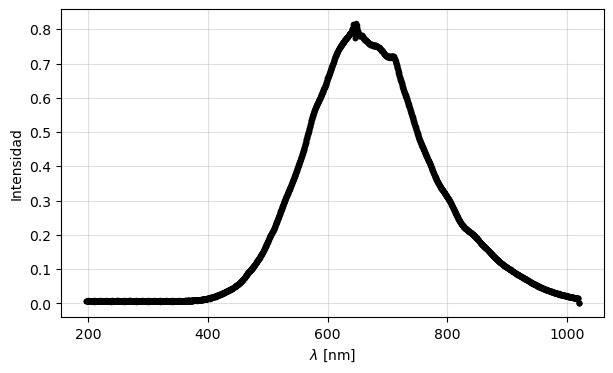

In [28]:
plt.plot(float_columna1, float_columna2, ".k")

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(150)

plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad')
plt.grid(alpha = 0.4)

plt.show()        

In [3]:
# función para recorrer los csv

def cargar_datos(ruta):
    df = pd.read_csv(ruta, skiprows=53)

    # Seleccionar las dos primeras columnas a partir de la fila 54
    # Recuerda que en pandas los índices empiezan en 0, por lo que la fila 54 es el índice 53
    columna1_data = df.iloc[0:-1, 0]
    columna2_data = df.iloc[0:-1, 1]

    # Convertir los datos a arrays de NumPy
    array_columna1 = np.array(columna1_data)
    array_columna2 = np.array(columna2_data)

    #son strings asique los hago float
    lambdas = [float(x) for x in array_columna1]
    intensidad = [float(x) for x in array_columna2]

    return lambdas, intensidad

lambdas, intensidad = cargar_datos('/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/17-10/halógena v2/promedio.csv')


#para obtener sólo las intensidades
def cargar_señal(ruta):
    df = pd.read_csv(ruta, skiprows=53)

    # Seleccionar las dos primeras columnas a partir de la fila 54
    # Recuerda que en pandas los índices empiezan en 0, por lo que la fila 54 es el índice 53
    columna2_data = df.iloc[0:-1, 1]

    # Convertir los datos a arrays de NumPy
    array_columna2 = np.array(columna2_data)

    #son strings asique los hago float
    intensidad = [float(x) for x in array_columna2]

    return intensidad

intensidad = cargar_señal('/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/17-10/halógena v2/promedio.csv')
print(len(intensidad))


3647


Calculamos, para cada lambda, la desviación estándar con las 1000 mediciones que hicimos

In [4]:
#esto crea una lista con todas las rutas de los archivos que son .csv en la carpeta especificada (hay que dejar el /*.csv)
archivos = sorted(glob.glob("/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/17-10/halógena v2/para el error/*.csv"))


# Cargar todos los datos en una lista
datos = [cargar_señal(f) for f in archivos]

# Convertir a un array 2D: shape (num_archivos, largo_señal)
matriz = np.stack(datos)

# Calcular la desviación estándar en cada punto (a lo largo de los archivos)
desv_std = np.std(matriz, axis=0)

# Ahora desv_std es un array 1D del mismo largo que cada señal
print(desv_std.shape)




(3647,)


In [16]:
print(desv_std)

[0.00213688 0.00214437 0.00213642 ... 0.00146041 0.00148975 0.00145257]


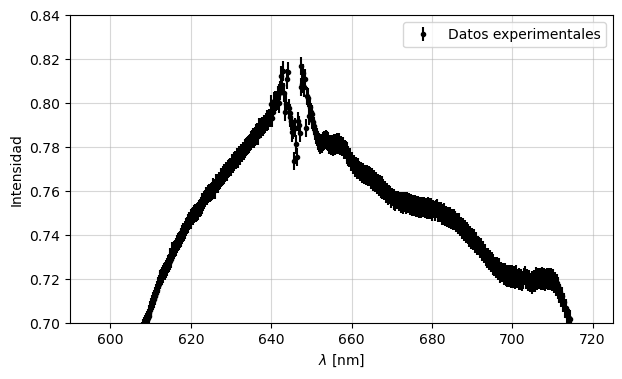

In [31]:

N = 1

plt.errorbar(float_columna1[::N], float_columna2[::N], yerr= desv_std[::N], fmt = ".k", ecolor = 'k', label = 'Datos experimentales')

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(150)

plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad')

plt.xlim(590, 725)
plt.ylim(0.70, 0.84)

plt.grid(alpha = 0.5)
plt.legend()
plt.show()        

In [5]:
def desviaciones(ruta_carpeta_con_csvs):
    
    archivos = sorted(glob.glob(ruta_carpeta_con_csvs + "/*.csv"))

    # Cargar todos los datos en una lista
    datos = [cargar_señal(f) for f in archivos]

    # Convertir a un array 2D: shape (num_archivos, largo_señal)
    matriz = np.stack(datos)

    # Calcular la desviación estándar en cada punto (a lo largo de los archivos)
    desv_std = np.std(matriz, axis=0)

    return desv_std

errores = desviaciones("/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/3-10/halógena/mediciones para el error")


In [33]:
# calculamos el offset producido por el ruido de fondo


archivos = sorted(glob.glob(r"/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/17-10/halógena v2/fondo - obscuridad/mediciones seguidas/*.csv"))

# Cargar todos los datos en una lista
datos = [cargar_señal(f) for f in archivos]

    # Convertir a un array 2D: shape (num_archivos, largo_señal)
matriz = np.stack(datos)

# Calculamos el promedio de cada longitud de onda
ruido_de_cada_csv = np.mean(matriz, axis=0)

# hacemos el promedio de esos promedios
offset = np.mean(ruido_de_cada_csv)

print(ruido_de_cada_csv.shape)

print(offset)

#hmm, da muy cercano a cero, pero capaz es mejor hacer el promedio de cada csv, y desp promediar eso, así no da tan cercano a cero

ruido_de_cada_csv_2 = np.mean(matriz, axis=1)
offset_2 = np.mean(ruido_de_cada_csv)

print(ruido_de_cada_csv_2.shape)

print(offset_2)

# también da súper chico así, y da el mismo número... raro, pero bueno de cualquier manera no va a ser grande, así que lo podemos despreciar


(3647,)
-3.4842541547141965e-05
(209,)
-3.4842541547141965e-05


Para poder ver la eficiencia, importo el espectro de la lámpara tabulado, luego interpolamos el tabulado, y calculamos el cociente
tomamos como error el del medido, ya que el error de los valores tabulados no los tenemos...

In [6]:
lambdas_med, intensidades_med = cargar_datos('/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/17-10/halógena v2/promedio.csv')

err_intensidad = desviaciones("/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/17-10/halógena v2/para el error")

# normalizo el espectro medido
intensidades_med = intensidades_med / np.max(intensidades_med)
err_intensidad = err_intensidad / np.max(intensidades_med)


df_tab = pd.read_csv("/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/halógena_tabulado.csv")

lambdas_tab = df_tab.iloc[:, 0].to_numpy() 
intensidades_tab = df_tab.iloc[:, 1].to_numpy() 


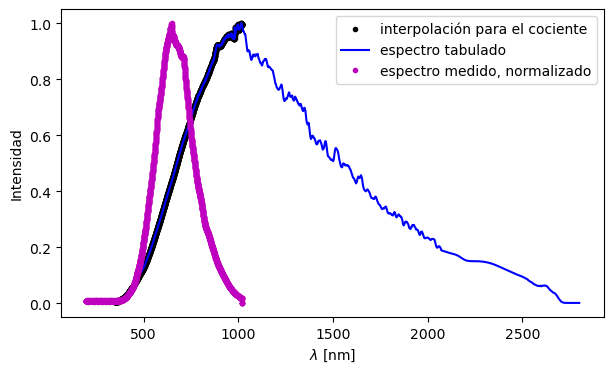

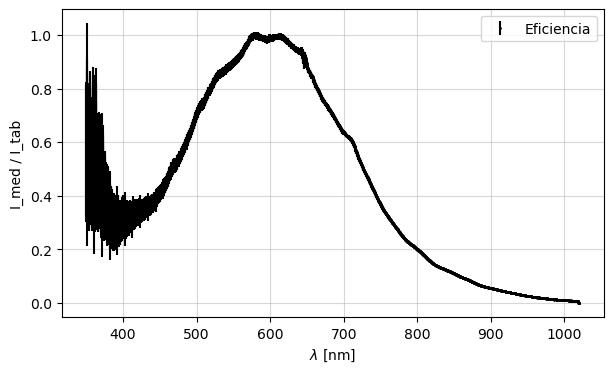

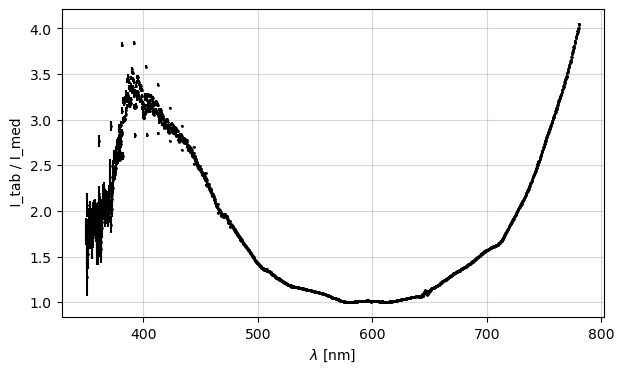

In [7]:
spline_tab = UnivariateSpline(lambdas_tab, intensidades_tab, s=0) # calculo la interpolación

x_fit = np.linspace(lambdas_tab[0], lambdas_tab[-1], 5000)

tabulados_interp = spline_tab(x_fit)

# Evaluamos a la interpolación en los lambdas medidos, y hacemos el cociente

#filtro los primeros porque como la interpolación se hizo con los tabulados y los tabulados arrancan recién en ~400nm, ahí no vale la interpolación(el polinomio tiende a infinito)
lambdas_med_filtrados= [num for num in lambdas_med if num > lambdas_tab[0]]
intensidades_med_filtradas = intensidades_med[(len(intensidades_med) - len(lambdas_med_filtrados)):] 
err_intensidad_filtrados = err_intensidad[(len(intensidades_med) - len(lambdas_med_filtrados)):] 

tabulados = spline_tab(lambdas_med_filtrados)

eficiencia = intensidades_med_filtradas / tabulados

err_eficiencia = err_intensidad_filtrados / tabulados


plt.plot(lambdas_med_filtrados, tabulados, ".k", label = 'interpolación para el cociente')
plt.plot(x_fit, tabulados_interp, "-b", label = 'espectro tabulado')
plt.plot(lambdas_med, intensidades_med, ".m", label = 'espectro medido, normalizado')
plt.legend(loc = 'upper right')
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('Intensidad')
#plt.xlim(lambdas_tab[0])
plt.show()

eficiencia = eficiencia / np.max(eficiencia)
err_eficiencia = err_eficiencia/np.max(eficiencia)

plt.errorbar(lambdas_med_filtrados, eficiencia, yerr= err_eficiencia, fmt = ".k", ecolor = 'k', markersize = 2, label = 'Eficiencia')
#plt.plot(lambdas_med_filtrados, eficiencia, ".k")
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel('I_med / I_tab')
plt.grid(alpha = 0.5)
plt.legend()
plt.show()

plt.errorbar(lambdas_med_filtrados[:-1000], (eficiencia**(-1))[:-1000], yerr= (err_eficiencia[:-1000])/((eficiencia**(-1))[:-1000]) , fmt = ".k", ecolor = 'k', markersize = 2, label = 'I_tab / I_med')
#plt.plot(lambdas_med_filtrados[:-1000], (eficiencia**(-1))[:-1000], ".k", markersize = 2)
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(' I_tab / I_med')
plt.grid(alpha = 0.5)
plt.show()


In [ ]:
# Esto lo podemos exportar a un csv para después poder multiplicar esto y obtener una relación entre amplitudes más real
# Lo podemos hacer mismo en la propia aplicación de Thorlabs


# I_med/ef =  I_real



In [8]:
# Exporto a un csv la eficiencia


#Pero voy a usar los valores desde 460 nm

#límite inferior 460 #nm
#límite superior 730 #nm

# Encontrar el primer índice donde a >= 460
idx_inferior = np.searchsorted(lambdas_med_filtrados, 460)
idx_superior = np.searchsorted(lambdas_med_filtrados, 730)


# Eliminar los primeros y últimos idx elementos en ambos arrays
lambdas_eff = lambdas_med_filtrados[idx_inferior:idx_superior]
eficiencias = eficiencia[idx_inferior:idx_superior]
err_eficiencias = err_eficiencia[idx_inferior:idx_superior]

print(lambdas_eff)
print(eficiencias) 

#plt.errorbar(lambdas_eff, eficiencias, yerr = err_eficiencias, fmt =".k", ecolor = 'k', markersize = 2)
#plt.show()


[460.151062, 460.3711853, 460.5913391, 460.8114929, 461.0316467, 461.2518005, 461.4719849, 461.6921692, 461.9123535, 462.1325684, 462.3527832, 462.5730286, 462.7932739, 463.0135193, 463.2337646, 463.4540405, 463.6743164, 463.8946228, 464.1149292, 464.3352356, 464.555542, 464.7758789, 464.9962158, 465.2165833, 465.4369507, 465.6573181, 465.8777161, 466.0980835, 466.318512, 466.5389099, 466.7593384, 466.9797668, 467.2002258, 467.4206848, 467.6411438, 467.8616333, 468.0821228, 468.3026123, 468.5231323, 468.7436523, 468.9641724, 469.1847229, 469.4052734, 469.625824, 469.846405, 470.0669861, 470.2875671, 470.5081787, 470.7287903, 470.9494019, 471.1700439, 471.390686, 471.6113281, 471.8320007, 472.0526733, 472.2733459, 472.4940491, 472.7147522, 472.9354553, 473.156189, 473.3769226, 473.5976868, 473.8184204, 474.0391846, 474.2599792, 474.4807739, 474.7015686, 474.9223633, 475.1431885, 475.3640137, 475.5848694, 475.8056946, 476.0265503, 476.2474365, 476.4683228, 476.689209, 476.9100952, 477.13

In [9]:


arrays = [lambdas_med_filtrados, eficiencia, err_eficiencia]
nombres_columnas = ['lambdas', 'eficiencia', 'err_eficiencia']  # títulos deseados

df_eff = pd.DataFrame({nombre: arr for nombre, arr in zip(nombres_columnas, arrays)})

#exporto
#df_eff.to_csv("/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/eficiencia.csv", index=False)









In [30]:
# defino una función para filtrar los espectros entre el rango en el que tenemos la eficiencia


def filtro_rango_eficiencia(lambdas, espectro, err_espectro, inferior, superior):

        
    # Encontrar el primer índice donde a >= 460
    idx_inferior = np.searchsorted(lambdas, inferior)
    idx_superior = np.searchsorted(lambdas, superior)

    lambdas_filtrados = lambdas[idx_inferior:idx_superior]
    espectro_filtrado = espectro[idx_inferior:idx_superior]
    err_espectro_filtrado = err_espectro[idx_inferior:idx_superior]

    return lambdas_filtrados, espectro_filtrado, err_espectro_filtrado


# le pasás la medición del promedio, la carpeta para los errores, la ruta del csv de las eficiencias y
# los límites con los que calculaste esa eficiencia, y te devuelve el espectro 'real' en ese intervalo

def eficientizar(ruta_espectro, ruta_carpeta_errores, ruta_eficiencia_csv, inferior, superior):

    lambdas, espectro = cargar_datos(ruta_espectro)
    err_espectro = desviaciones(ruta_carpeta_errores)

    # normalizo el espectro medido
    espectro = espectro / np.max(espectro)
    err_espectro = err_espectro / np.max(espectro)

    #filtro en el rango elegido
    lambdas_filtrados, espectro_filtrado, err_espectro_filtrado = filtro_rango_eficiencia(lambdas, espectro, err_espectro, inferior, superior)
  
    #importo la eficiencia

    df_eficiencia = pd.read_csv(ruta_eficiencia_csv)

    columna1_data = df_eficiencia.iloc[0:-1, 0]
    columna2_data = df_eficiencia.iloc[0:-1, 1]
    columna3_data = df_eficiencia.iloc[0:-1, 2]

    # Convertir los datos a arrays de NumPy
    lambdas_eficiencia = np.array(columna1_data)
    eficiencia = np.array(columna2_data)
    err_eficiencia = np.array(columna3_data)


    # filtro la eficiencia en el rango elegido
    lambdas_eficiencias_filtrados, eficiencias_filtradas, err_eficiencias_filtradas = filtro_rango_eficiencia(lambdas_eficiencia, eficiencia, err_eficiencia, inferior, superior)

    #divido por la eficiencia

    espectro_real = espectro_filtrado / eficiencias_filtradas

    #propago el error del cociente

    err_espectro_real = espectro_real * np.sqrt( (err_espectro_filtrado/espectro_filtrado)**2 + (err_eficiencias_filtradas/eficiencias_filtradas)**2 )

    return lambdas_filtrados, espectro_real, err_espectro_real


In [11]:
df_eficiencia = pd.read_csv("/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/eficiencia.csv")

columna1_data = df_eficiencia.iloc[0:-1, 0]
columna2_data = df_eficiencia.iloc[0:-1, 1]
columna3_data = df_eficiencia.iloc[0:-1, 2]

    # Convertir los datos a arrays de NumPy
eficiencia = np.array(columna2_data)
err_eficiencia = np.array(columna3_data)

columna3_data = df_eficiencia.iloc[0:-1, 2]
lambdas_eficiencia = np.array(columna1_data)


#print(df_eficiencia)
#print(lambdas_eficiencia)


pruebo la función

In [19]:
inferior = 460
superior = 730

lambdas, espectro = cargar_datos("/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/3-10/halógena/halógena_promedio.csv")
err_espectro = desviaciones("/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/3-10/halógena/mediciones para el error")

# normalizo el espectro medido
espectro = espectro / np.max(espectro)
err_espectro = err_espectro / np.max(espectro)

#filtro en el rango elegido
lambdas_filtrados, espectro_filtrado, err_espectro_filtrado = filtro_rango_eficiencia(lambdas, espectro, err_espectro, inferior, superior)

#importo la eficiencia

df_eficiencia = pd.read_csv("/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/eficiencia.csv")

columna1_data = df_eficiencia.iloc[0:-1, 0]
columna2_data = df_eficiencia.iloc[0:-1, 1]
columna3_data = df_eficiencia.iloc[0:-1, 2]

# Convertir los datos a arrays de NumPy
lambdas_eficiencia = np.array(columna1_data)
eficiencia = np.array(columna2_data)
err_eficiencia = np.array(columna3_data)


# filtro la eficiencia en el rango elegido
lambdas_eficiencias_filtrados, eficiencias_filtradas, err_eficiencias_filtradas = filtro_rango_eficiencia(lambdas_eficiencia, eficiencia, err_eficiencia, inferior, superior)


#divido por la eficiencia

espectro_real = espectro_filtrado / eficiencias_filtradas

#propago el error del cociente

err_espectro_real = espectro_real * np.sqrt( (err_espectro_filtrado/espectro_filtrado)**2 + (err_eficiencias_filtradas/eficiencias_filtradas)**2 )

#lambdas_filtrados, espectro_real, err_espectro_real


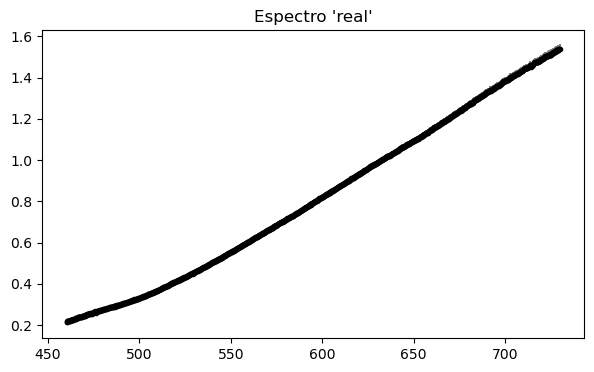

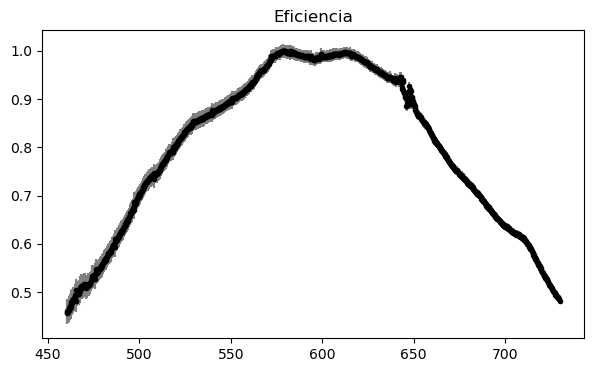

In [24]:
#err_espectro_real = espectro_real * np.sqrt( (err_espectro_filtrado/espectro_filtrado)**2 + (err_eficiencias_filtradas/eficiencias_filtradas)**2 )


plt.errorbar(lambdas_filtrados, espectro_real, yerr = err_espectro_real, ecolor= 'gray', fmt = ".k")
plt.title("Espectro 'real'")
plt.show()


plt.errorbar(lambdas_eficiencias_filtrados, eficiencias_filtradas, yerr = err_eficiencias_filtradas, ecolor= 'gray', fmt = ".k")
plt.title("Eficiencia")
plt.show()


Perfecto, no metimos directamente la información del espectro tabulado, pero obtenemos lo que tiene que pasar, que es que en ese rango crece el espectro de la halógena

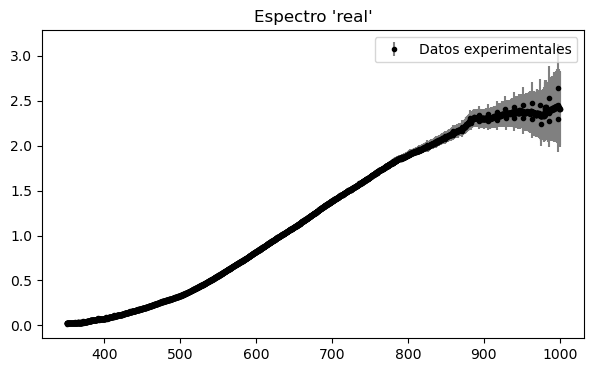

In [29]:
lambdas_filtrados, espectro_real, err_espectro_real = eficientizar("/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/3-10/halógena/halógena_promedio.csv", "/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/3-10/halógena/mediciones para el error", "/Users/Mauri/Desktop/Labo 5/Espectroscopía difractiva/eficiencia.csv",
                                                                    350, 1000)


plt.errorbar(lambdas_filtrados, espectro_real, yerr = err_espectro_real, ecolor= 'gray', fmt = ".k", label = 'Datos experimentales')
plt.title("Espectro 'real'")
plt.legend()
plt.show()




Paso en limpio las funciones:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import glob
import matplotlib.ticker as ticker

import matplotlib as mpl

# Configurar escala predeterminada (por ejemplo, tamaño de figura)
mpl.rcParams['figure.figsize'] = [7, 4]   # Ancho x Alto en pulgadas

from scipy.interpolate import UnivariateSpline


In [3]:

def cargar_datos(ruta):
    df = pd.read_csv(ruta, skiprows=53)

    # Seleccionar las dos primeras columnas a partir de la fila 54
    # Recuerda que en pandas los índices empiezan en 0, por lo que la fila 54 es el índice 53
    columna1_data = df.iloc[0:-1, 0]
    columna2_data = df.iloc[0:-1, 1]

    # Convertir los datos a arrays de NumPy
    array_columna1 = np.array(columna1_data)
    array_columna2 = np.array(columna2_data)

    #son strings asique los hago float
    lambdas = [float(x) for x in array_columna1]
    intensidad = [float(x) for x in array_columna2]

    return lambdas, intensidad

#para obtener sólo las intensidades
def cargar_señal(ruta):
    df = pd.read_csv(ruta, skiprows=53)

    # Seleccionar las dos primeras columnas a partir de la fila 54
    # Recuerda que en pandas los índices empiezan en 0, por lo que la fila 54 es el índice 53
    columna2_data = df.iloc[0:-1, 1]

    # Convertir los datos a arrays de NumPy
    array_columna2 = np.array(columna2_data)

    #son strings asique los hago float
    intensidad = [float(x) for x in array_columna2]

    return intensidad


def desviaciones(ruta_carpeta_con_csvs):
    
    archivos = sorted(glob.glob(ruta_carpeta_con_csvs + "/*.csv"))

    # Cargar todos los datos en una lista
    datos = [cargar_señal(f) for f in archivos]

    # Convertir a un array 2D: shape (num_archivos, largo_señal)
    matriz = np.stack(datos)

    # Calcular la desviación estándar en cada punto (a lo largo de los archivos)
    desv_std = np.std(matriz, axis=0)

    return desv_std


def filtro_rango_eficiencia(lambdas, espectro, err_espectro, inferior, superior):

        
    # Encontrar el primer índice donde a >= 460
    idx_inferior = np.searchsorted(lambdas, inferior)
    idx_superior = np.searchsorted(lambdas, superior)

    lambdas_filtrados = lambdas[idx_inferior:idx_superior]
    espectro_filtrado = espectro[idx_inferior:idx_superior]
    err_espectro_filtrado = err_espectro[idx_inferior:idx_superior]

    return lambdas_filtrados, espectro_filtrado, err_espectro_filtrado


# le pasás la medición del promedio, la carpeta para los errores, la ruta del csv de las eficiencias y
# los límites con los que calculaste esa eficiencia, y te devuelve el espectro 'real' en ese intervalo

def eficientizar(ruta_espectro, ruta_carpeta_errores, ruta_eficiencia_csv, inferior, superior):

    lambdas, espectro = cargar_datos(ruta_espectro)
    err_espectro = desviaciones(ruta_carpeta_errores)

    # normalizo el espectro medido
    espectro = espectro / np.max(espectro)
    err_espectro = err_espectro / np.max(espectro)

    #filtro en el rango elegido
    lambdas_filtrados, espectro_filtrado, err_espectro_filtrado = filtro_rango_eficiencia(lambdas, espectro, err_espectro, inferior, superior)
  
    #importo la eficiencia

    df_eficiencia = pd.read_csv(ruta_eficiencia_csv)

    columna1_data = df_eficiencia.iloc[0:-1, 0]
    columna2_data = df_eficiencia.iloc[0:-1, 1]
    columna3_data = df_eficiencia.iloc[0:-1, 2]

    # Convertir los datos a arrays de NumPy
    lambdas_eficiencia = np.array(columna1_data)
    eficiencia = np.array(columna2_data)
    err_eficiencia = np.array(columna3_data)


    # filtro la eficiencia en el rango elegido
    lambdas_eficiencias_filtrados, eficiencias_filtradas, err_eficiencias_filtradas = filtro_rango_eficiencia(lambdas_eficiencia, eficiencia, err_eficiencia, inferior, superior)

    #divido por la eficiencia

    espectro_real = espectro_filtrado / eficiencias_filtradas

    #propago el error del cociente

    err_espectro_real = espectro_real * np.sqrt( (err_espectro_filtrado/espectro_filtrado)**2 + (err_eficiencias_filtradas/eficiencias_filtradas)**2 )

    return lambdas_filtrados, espectro_real, err_espectro_real
